In [1]:
import vice
import arya
import matplotlib.pyplot as plt
import pandas as pd
from surp.analysis.vice_model import vice_model
import numpy as np

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


ModuleNotFoundError: No module named 'surp.analysis'

In [2]:
mz = vice.output("../out/C11_f0.2_dt0.05_zw0.05.vice/")
mz2 = vice.output("../out/C11_f0.2_zw0.2.vice/")

/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/vice-1.4.0.dev2-py3.9-linux-x86_64.egg/vice/core/outputs/output.py:131: UserWarning: agb c yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)


In [3]:
fiducial = vice_model("../out/C11_f0.2.json")

In [4]:
h = [mz.zones[f"zone{i}"].history[-1].todict() for i in range(400)]
h = pd.DataFrame(h)

In [5]:
h2 = [mz2.zones[f"zone{i}"].history[-1].todict() for i in range(100)]
h2 = pd.DataFrame(h2)

(-0.8, 0.6)

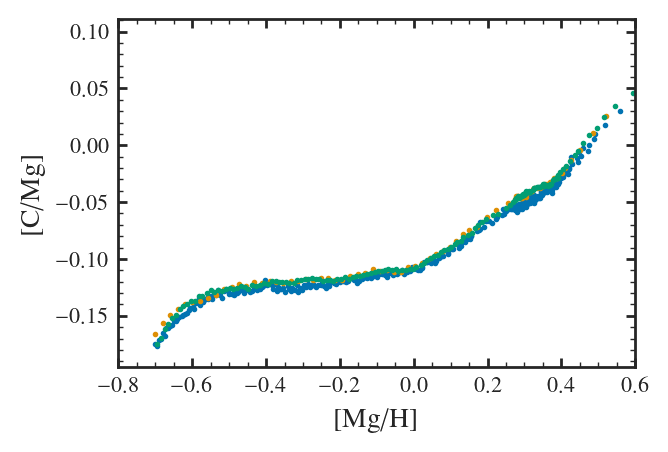

In [27]:
plt.scatter(h["[o/h]"], h["[c/o]"], s=1)
plt.scatter(h2["[o/h]"], h2["[c/o]"], s=1)

h1 = fiducial.history
filt = h1.time == np.max(h1.time)

plt.scatter(h1[filt]["[o/h]"], h1[filt]["[c/o]"], s=1)
plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")

plt.xlim(-0.8, 0.6)

In [9]:
R = np.linspace(0, 20, len(h))
R2 = np.linspace(0, 20, len(h2))

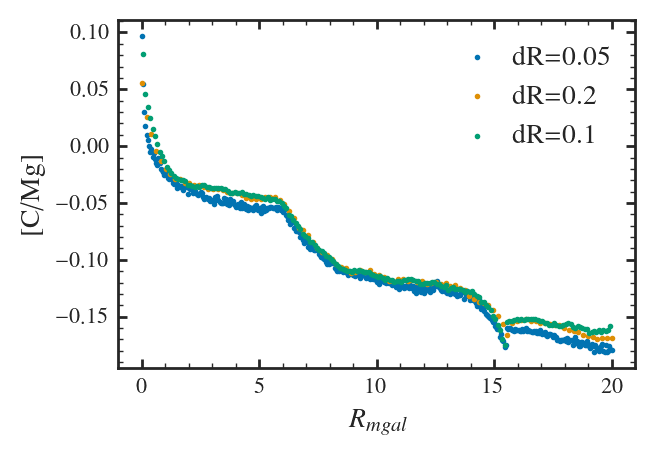

In [11]:
plt.scatter(R, h["[c/o]"], s=1, label="dR=0.05")
plt.scatter(R2, h2["[c/o]"], s=1, label="dR=0.2")

h1 = fiducial.history
filt = h1.time == np.max(h1.time)

plt.scatter(h1[filt]["R"], h1[filt]["[c/o]"], s=1, label="dR=0.1")
plt.xlabel("$R_{\rm gal}$")
plt.ylabel("[C/Mg]")
plt.legend()

In [16]:
s = pd.DataFrame(mz.stars.todict())
s2 = pd.DataFrame(mz2.stars.todict())

In [13]:
s1 = fiducial.stars_unsampled

In [23]:
s_sol = s[s.zone_final == 140]
s1_sol = s1[s1.zone_final == 70]
s2_sol = s2[s2.zone_final == 35]

In [20]:
import seaborn as sns

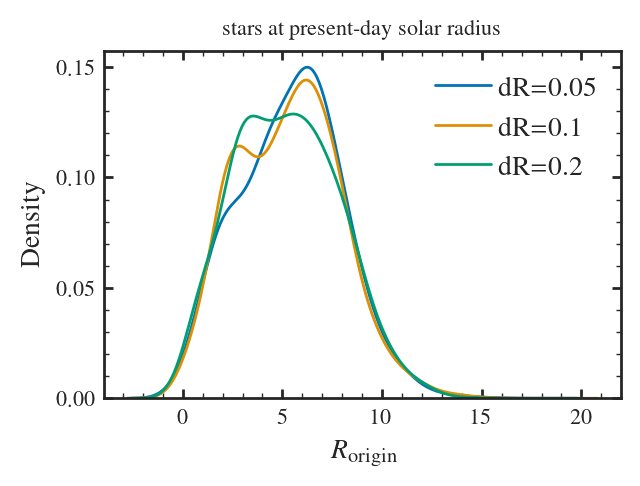

In [26]:
sns.kdeplot(x=s_sol.zone_origin / 20, weights=s_sol.mass, label="dR=0.05")
sns.kdeplot(x=s1_sol.zone_origin / 10, weights=s1_sol.mass, label="dR=0.1")
sns.kdeplot(x=s2_sol.zone_origin / 5, weights=s2_sol.mass, label="dR=0.2")

plt.xlabel("$R_{\\rm origin}$")
plt.legend()
plt.title("stars at present-day solar radius")
plt.savefig("figures/r_birth_dw.pdf")